# Exercise 1 computer assignments

Fill in the parts labeled **your solution here** and replace *...* with your code. You *do not* need to strictly follow the template, but you may lose points if you do not provide the required results.

## Basic definition
### Model Initialize

In [335]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [336]:
class SimpleNN(nn.Module):
    def __init__(self, activation_fn, weights=None):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(5, 5)
        self.layer2 = nn.Linear(5, 5)
        self.layer3 = nn.Linear(5, 5)
        self.activation_fn = activation_fn

        if weights is not None:
            self.set_weights(weights)

    def forward(self, x):
        x = self.activation_fn(self.layer1(x))
        x = self.activation_fn(self.layer2(x))
        x = self.activation_fn(self.layer3(x))
        return x

    def set_weights(self, weights):
        with torch.no_grad():
            # set weight if weights not None
            self.layer1.weight = nn.Parameter(torch.tensor(weights[0][0], dtype=torch.float32))
            self.layer1.bias = nn.Parameter(torch.tensor(weights[0][1], dtype=torch.float32))
            self.layer2.weight = nn.Parameter(torch.tensor(weights[1][0], dtype=torch.float32))
            self.layer2.bias = nn.Parameter(torch.tensor(weights[1][1], dtype=torch.float32))
            self.layer3.weight = nn.Parameter(torch.tensor(weights[2][0], dtype=torch.float32))
            self.layer3.bias = nn.Parameter(torch.tensor(weights[2][1], dtype=torch.float32))

### Parameter Initialize

In [337]:
#Activate function list
activation_functions = {'func': [torch.tanh, torch.relu, lambda x: x],'name':['Tanh','ReLU','Linear']} 
# linear func. can also be instead of empty, but the variable type should be pay attention
activation_functions

{'func': [<function torch._VariableFunctionsClass.tanh>,
  <function torch._VariableFunctionsClass.relu>,
  <function __main__.<lambda>(x)>],
 'name': ['Tanh', 'ReLU', 'Linear']}

In [338]:
# Randomly generate fixed x_i (i > 1)
fixed_x = ( 2 * np.random.rand(4)-1).tolist()
fixed_x

[0.022196896536717192,
 0.5696470606783874,
 0.9973668324676219,
 0.8151119750386298]

In [339]:
# The variation range of x1
x1_range = [-10.0, 10.0]
x1_range

[-10.0, 10.0]

In [340]:
def plot_function(model, x1_range, fixed_x):
    x1_values = np.linspace(x1_range[0], x1_range[1], 100)
    y1_values = []

    for x1 in x1_values:
        # Construct the input tensor, fixing other inputs except x1
        x_tensor = torch.tensor([[x1] + fixed_x], dtype=torch.float32)
        # Calculate model output
        with torch.no_grad():
            y_tensor = model(x_tensor)
        y1_values.append(y_tensor.numpy()[0][0])

    return x1_values, y1_values

In [341]:
import torch
import numpy as np

# Initialize random weights and biases
# Each set of weights contains three layers of weights and biases, each layer is a 5x5 matrix and the bias is a vector of length 5
weights_sets = [
    [
        [2 * np.random.rand(5, 5) - 1, 2 * np.random.rand(5) - 1] for _ in range(3) # for 3 layers
    ] for _ in range(3)  # for 3 set
]
# OR use torch.rand
weights_sets[0]

[[array([[-0.97160394, -0.65537881,  0.72025141, -0.38593174,  0.44797721],
         [-0.28493993,  0.8361524 , -0.01085246, -0.17474277, -0.15373495],
         [-0.17402858,  0.44417524,  0.86776102,  0.25646113, -0.83935782],
         [-0.13059409, -0.90600339, -0.33791486,  0.79850945,  0.99665482],
         [-0.5628089 ,  0.91085979, -0.68820692,  0.98070565,  0.84152463]]),
  array([-0.53340278,  0.12007684,  0.78159886,  0.58865485,  0.27723997])],
 [array([[ 0.34732201, -0.60338832, -0.04940371, -0.17608228, -0.14320074],
         [ 0.19071268, -0.91267163, -0.08635307, -0.65295472,  0.44790081],
         [ 0.76187498, -0.91349246, -0.65699143,  0.4270485 , -0.73961952],
         [ 0.62352139, -0.2358396 , -0.31422801, -0.63009564,  0.0457558 ],
         [ 0.51319634,  0.45702021,  0.16594889,  0.53000058, -0.05889747]]),
  array([-0.76957826, -0.20302117, -0.22616618,  0.09598247, -0.86011907])],
 [array([[ 0.3678736 , -0.90157552, -0.10908048,  0.27183673,  0.10514297],
      

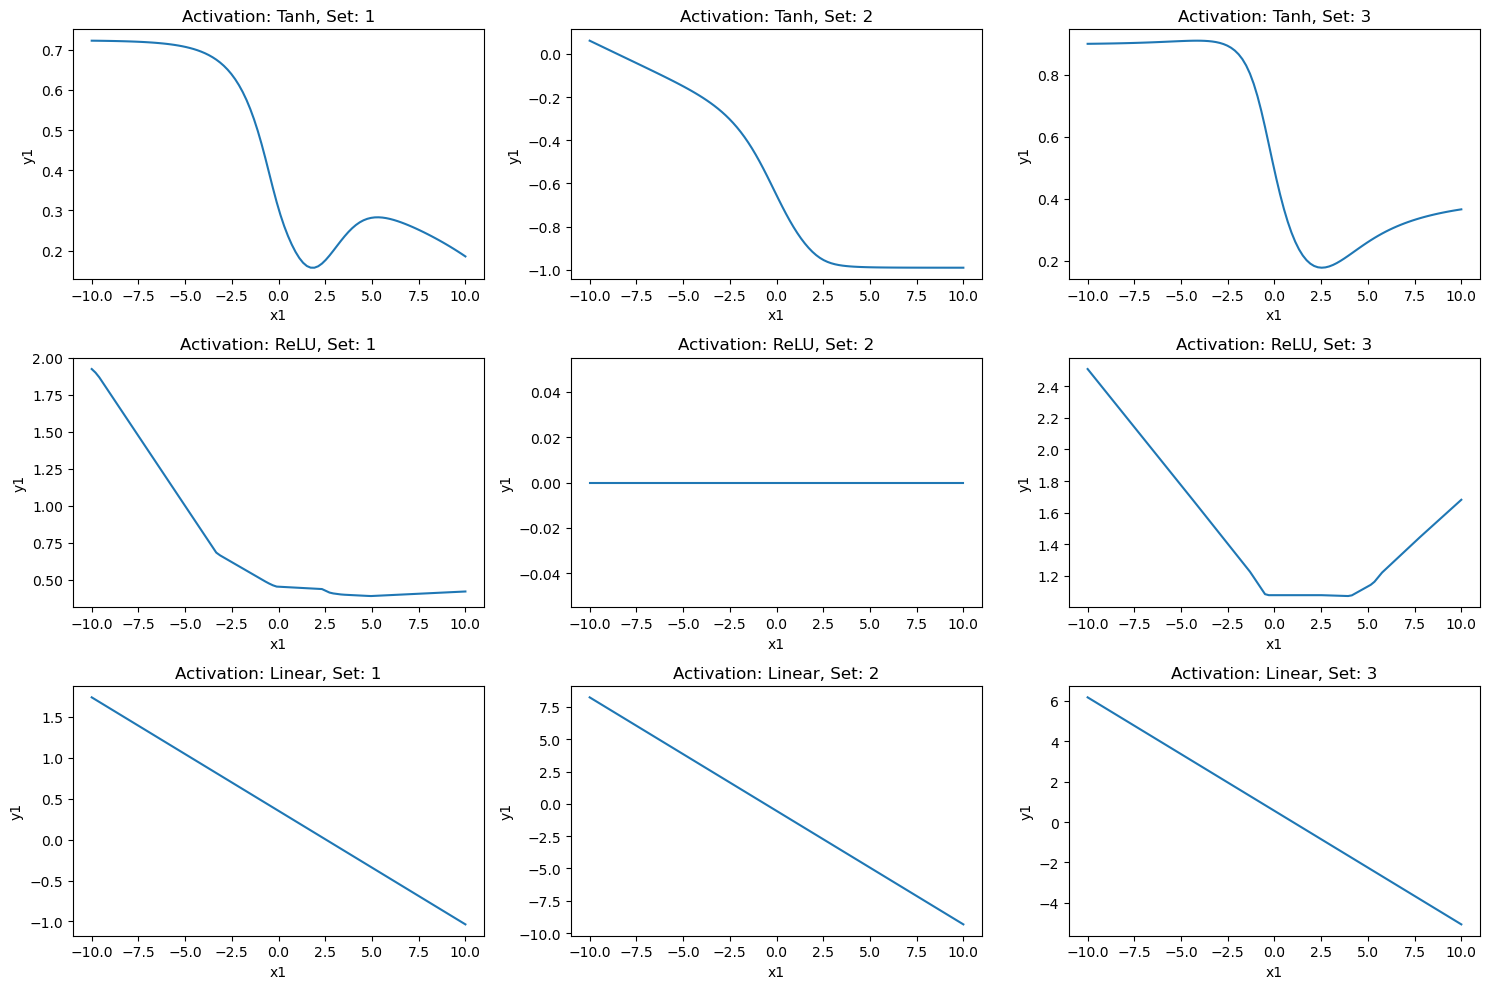

In [342]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i in range(3):
    for j in range(3):
        model = SimpleNN(activation_functions['func'][i], weights=weights_sets[j])
        
        x_values, y_values = plot_function(model, x1_range, fixed_x)
        axs[i, j].plot(x_values, y_values)
        axs[i, j].set_title(f"Activation: {activation_functions['name'][i]}, Set: {j+1}")
        axs[i, j].set_xlabel('x1')
        axs[i, j].set_ylabel('y1')

plt.tight_layout()
plt.show()

### Summary

#### What I Did

In this exercise, we investigated the impact of various activation functions on the fitting capabilities of a neural network within a multi-dimensional context. By fixing the values of $y_i$ for $i>4$ and utilizing a set of predetermined weight vectors, we were able to maintain consistent conditions across our experiments. This approach allowed us to methodically examine the differences in performance between linear and non-linear activation functions.

#### Results

From our observations, we discerned two key insights:

1. **Comparison Between Linear and Non-linear Activation Functions**:
   - It was evident that non-linear activation functions significantly enhance the neural network's ability to fit complex data. This enhancement is attributed to the non-linear nature of these functions, which introduces a level of flexibility absent in linear activation functions.
   - However, the use of non-linear activation functions also complicates the expression of a clear fitting function. Consequently, it necessitates the implementation of a loss (objective) function to effectively evaluate the fitting performance.

2. **Contrasting ReLU with Tanh Functions**:
   - Our analysis revealed that networks utilizing the ReLU activation function exhibited sections of the output that appeared as straight lines. This phenomenon is a direct result of ReLU's binary operation, defined as $ReLU(x) = \max(x,0)$. Through successive layers, this operation can lead to outputs that manifest as linear segments interspersed with peaks.
   - In comparison, the tanh function, which scales the output between -1 and 1, generally provided smoother transitions across the range of inputs.


## 2 Optimization

### 1.

In [343]:
import numpy as np
import matplotlib.pyplot as plt
import copy

np.random.seed(1)

#### (a) Func. Definition and Visualization 

In [344]:
def f(w):
    w1, w2 = w
    return np.exp(-w1**2 - 2*(w2 - 1)**2) + np.exp(-(w1 - 1)**2 - 2*w2**2)

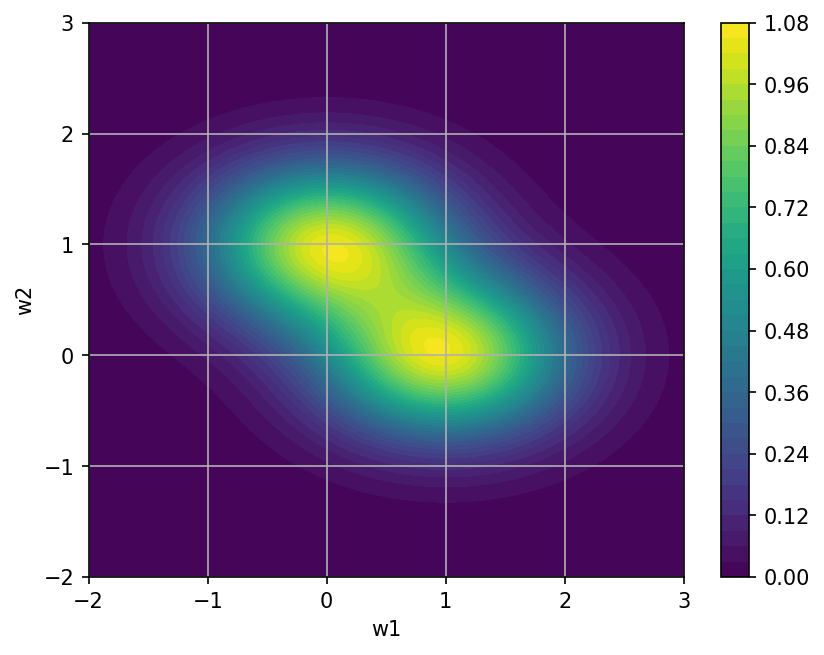

In [345]:
vec_f = np.vectorize(f, signature="(n)->()")
w1 = np.linspace(-2.0, 3.0, 200)
w2 = np.linspace(-2.0, 3.0, 200)
W1, W2 = np.meshgrid(w1, w2)
Fs = vec_f(np.stack((W1, W2), axis=2))

plt.figure(dpi=150)
plt.grid(True)
plt.xlabel("w1")
plt.ylabel("w2")
contourf = plt.contourf(W1, W2,Fs,40,cmap='viridis')  # Use contourf for filled contour
# If isocontours, use contour, and use the follow sentence to see the value of isocontours.
# plt.clabel(contour, inline=True, fontsize=4)
plt.colorbar(contourf)
plt.show()

#### (b) The Gradient of the Function 

To calculate the gradient of the function 

$$ f(w) = \exp(-w_1^2 - 2(w_2 - 1)^2) + \exp(-(w_1 - 1)^2 - 2w_2^2), $$

we need to find the partial derivatives with respect to $w_1$ and $w_2$.

1. **Partial derivative with respect to $ w_1 $:**

$$
\frac{\partial f}{\partial w_1} = \frac{\partial}{\partial w_1} \left( \exp(-w_1^2 - 2(w_2 - 1)^2) \right) + \frac{\partial}{\partial w_1} \left( \exp(-(w_1 - 1)^2 - 2w_2^2) \right)
$$

$$
= -2w_1 \exp(-w_1^2 - 2(w_2 - 1)^2) - 2(w_1 - 1) \exp(-(w_1 - 1)^2 - 2w_2^2)
$$

2. **Partial derivative with respect to $ w_2 $:**

$$
\frac{\partial f}{\partial w_2} = \frac{\partial}{\partial w_2} \left( \exp(-w_1^2 - 2(w_2 - 1)^2) \right) + \frac{\partial}{\partial w_2} \left( \exp(-(w_1 - 1)^2 - 2w_2^2) \right)
$$

$$
= -4(w_2 - 1) \exp(-w_1^2 - 2(w_2 - 1)^2) - 4w_2 \exp(-(w_1 - 1)^2 - 2w_2^2)
$$

**Therefore, the gradient of $ f(w) $ is:**

$$
\nabla f(w) = \begin{bmatrix} \frac{\partial f}{\partial w_1} \\ \frac{\partial f}{\partial w_2} \end{bmatrix} = \begin{bmatrix} -2w_1 \exp(-w_1^2 - 2(w_2 - 1)^2) - 2(w_1 - 1) \exp(-(w_1 - 1)^2 - 2w_2^2) \\ -4(w_2 - 1) \exp(-w_1^2 - 2(w_2 - 1)^2) - 4w_2 \exp(-(w_1 - 1)^2 - 2w_2^2) \end{bmatrix}
$$

**To simplify the expression for the gradient of the result function**

- Let $ A(w_1, w_2) = -w_1^2 - 2(w_2 - 1)^2 $,
- Let $ B(w_1, w_2) = -(w_1 - 1)^2 - 2w_2^2 $.

Then the original gradient expression is then rewritten using these functions as follows:

$$
\nabla f(w) = \begin{bmatrix} \frac{\partial f}{\partial w_1} \\ \frac{\partial f}{\partial w_2} \end{bmatrix} = \begin{bmatrix} -2w_1 \exp(A(w_1, w_2)) - 2(w_1 - 1) \exp(B(w_1, w_2)) \\ -4(w_2 - 1) \exp(A(w_1, w_2)) - 4w_2 \exp(B(w_1, w_2)) \end{bmatrix}. 
$$

In this way, by explicitly denoting $A(w_1, w_2)$ and $B(w_1, w_2)$ as functions of $w_1$ and $w_2$, we achieve a clearer and more concise mathematical representation of the gradient. This approach maintains the presence of the exponential function in the expression while simplifying the gradient's formula by encapsulating the dependency on $w_1$ and $w_2$ within $A$ and $ B$.

This gradient represents the rate of change of the function $ f(w) $ at any point $ w = (w_1, w_2) $ along the directions of $ w_1 $ and $ w_2 $. In optimization problems, this gradient can guide how to adjust $ w $ to find the minimum value of the function.


#### (c) 

In [346]:
import numpy as np
import pandas as pd

#Define gradient function
def grad_f(w):
    w1, w2 = w
    a = -w1**2 - 2*(w2 - 1)**2
    b = -(w1 - 1)**2 - 2 *w2**2
    return np.array([
        -2*w1*np.exp(a) - 2*(w1 - 1)*np.exp(b),
        -4*(w2 - 1)*np.exp(a) - 4*w2*np.exp(b)
    ])

In [347]:
# Initialization parameters
initial_points = [(0.2, 0.5), (0.5, 0.2), (1.0, 1.0)]
step_sizes = [0.5,0.1, 0.01] # Try different learning rates
# when step_size = 1, it won't converge 
threshold = 1e-4 # Threshold for stop condition

In [348]:
results_df = pd.DataFrame(columns=['Initial Point', 'Step Size', 'Iterations', 'Final w', 'Max func. value'])
historys = []

for point in initial_points:
    
    for mu in step_sizes:
        w = np.array(point)
        
        iteration = 0
        history = [w]
        while True:
            grad = grad_f(w)
            if np.linalg.norm(grad) < threshold: # If the module of the gradient is less than the threshold, stop
                break
            w = w + mu * grad #Update rules
            history.append(w)
            iteration += 1
        
        historys.append(history)
        
        new_row = pd.DataFrame({
            'Initial Point': str(point),
            'Step Size': mu,
            'Iterations': iteration,
            'Final w': [f"({w[0].round(4)}, {w[1].round(4)})"],
            'Max func. value': f(w)
        })
        results_df = pd.concat([results_df, new_row], ignore_index=True)

results_df

,Initial Point,Step Size,Iterations,Final w,Max func. value
0,"(0.2, 0.5)",0.50,17,"(0.0707, 0.9293)",1.060077
1,"(0.2, 0.5)",0.10,55,"(0.0708, 0.9293)",1.060077
2,"(0.2, 0.5)",0.01,575,"(0.0708, 0.9293)",1.060077
3,"(0.5, 0.2)",0.50,17,"(0.9293, 0.0707)",1.060077
4,"(0.5, 0.2)",0.10,54,"(0.9292, 0.0707)",1.060077
5,"(0.5, 0.2)",0.01,577,"(0.9292, 0.0707)",1.060077
6,"(1.0, 1.0)",0.50,16,"(0.0707, 0.9293)",1.060077
7,"(1.0, 1.0)",0.10,65,"(0.0708, 0.9293)",1.060077
8,"(1.0, 1.0)",0.01,678,"(0.0708, 0.9293)",1.060077


In [349]:
def find_best_histories(historys):
    """
    Select the three histories with the least number of iterations from the given list of histories
    Args.
        historys (list): list containing history records

    Returns.
        list: the three history records with the lowest number of iterations
    """
    return sorted(historys, key=lambda x: len(x))[:3]

best_histories = find_best_histories(best_historys)

#### (d)

d:\TEMP\ipykernel_9232\222329514.py:23: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(contour)


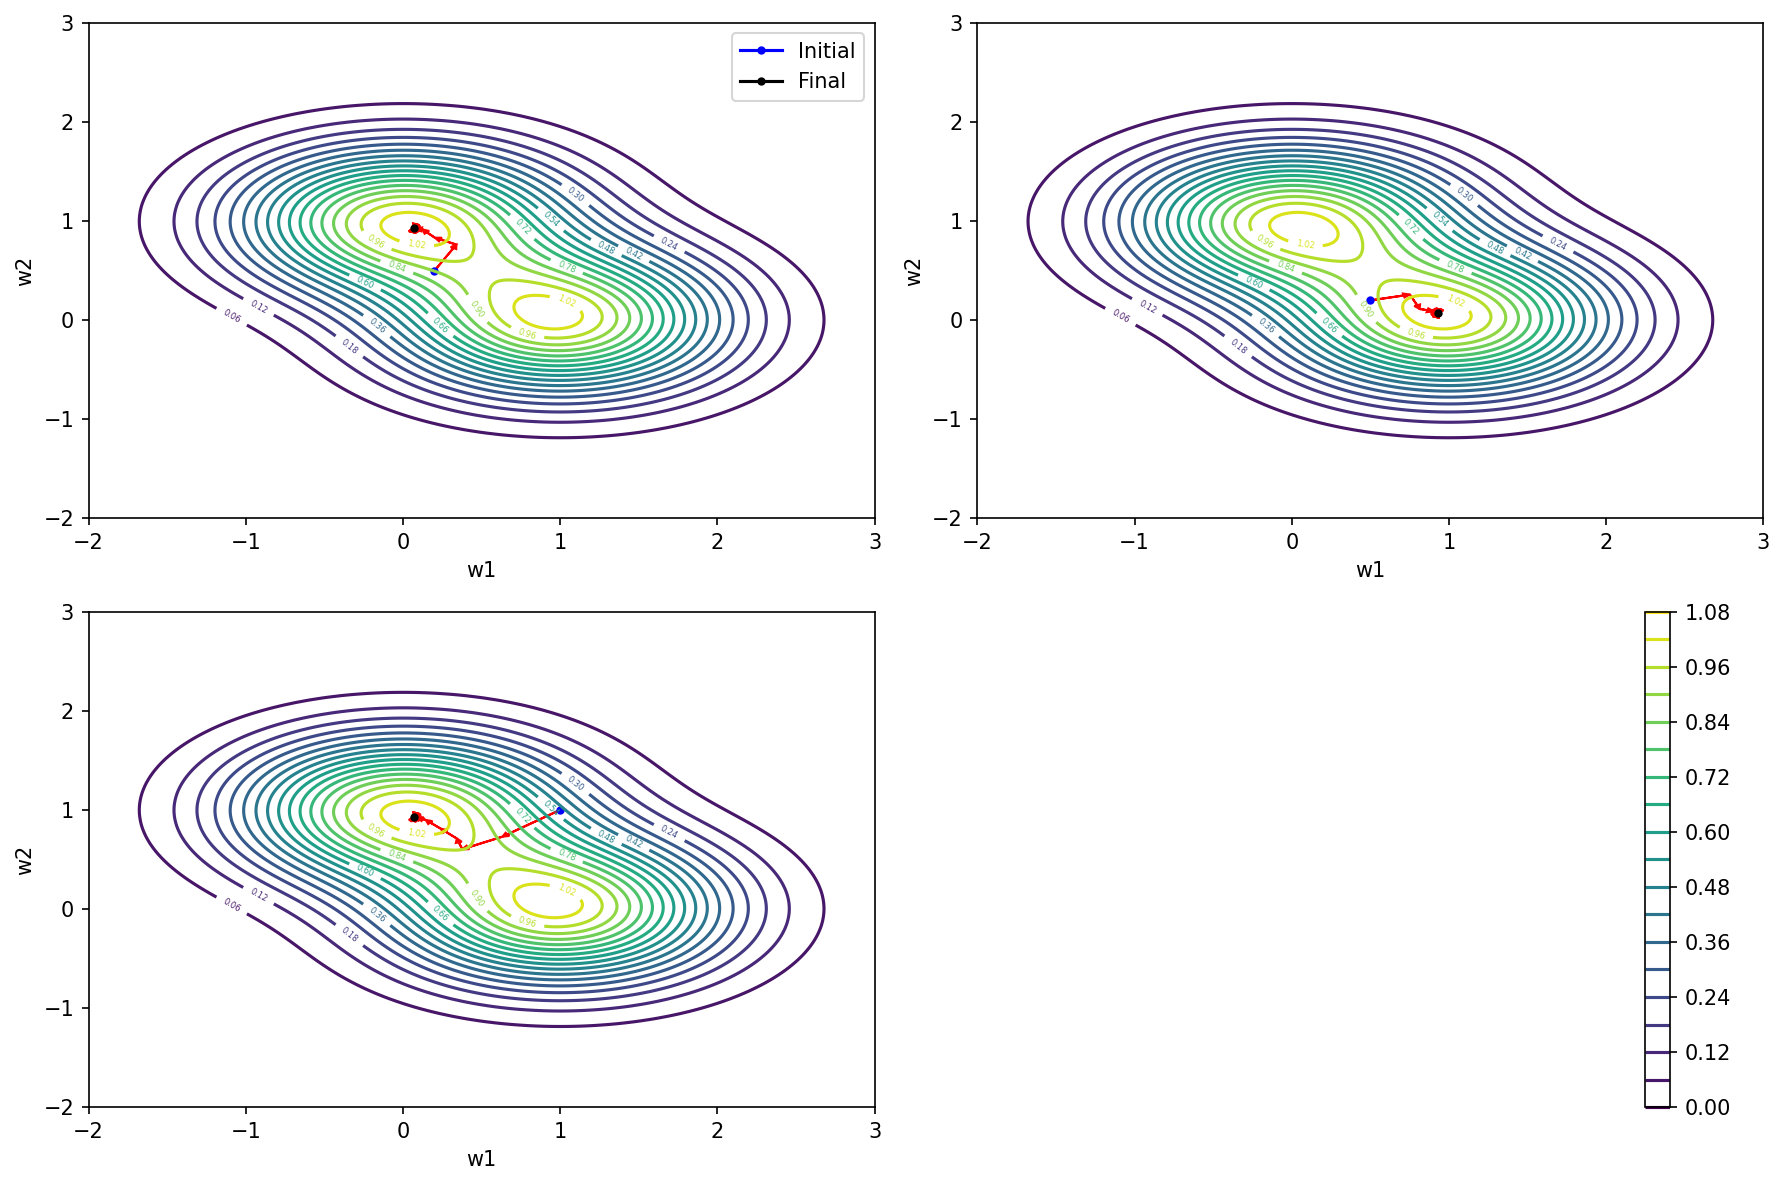

In [350]:
fig, axs = plt.subplots(2, 2, figsize=(12,8), dpi=150)
axs = axs.flatten()

for idx, history in enumerate(best_historys):
    ax = axs[idx]
    
    ax.plot(history[0][0], history[0][1], marker="o", color="blue", label="Initial", markersize=3)
    
    for i in range(len(history)-1):
            ax.arrow(history[i][0], history[i][1], history[i+1][0]-history[i][0], history[i+1][1]-history[i][1], 
                      head_width=0.04, head_length=0.04, fc='red', ec='red', length_includes_head=True)

    ax.plot(history[-1][0], history[-1][1], marker="o", color="black", label="Final", markersize=3)
    
    contour = ax.contour(W1, W2,Fs,20,cmap='viridis')
    ax.clabel(contour, inline=True, fontsize=4)
    ax.set_xlabel("w1")
    ax.set_ylabel("w2")
    if idx == 0:
            ax.legend()
            
axs[-1].axis('off')
plt.colorbar(contour)
plt.tight_layout()
plt.show()

#### (e)

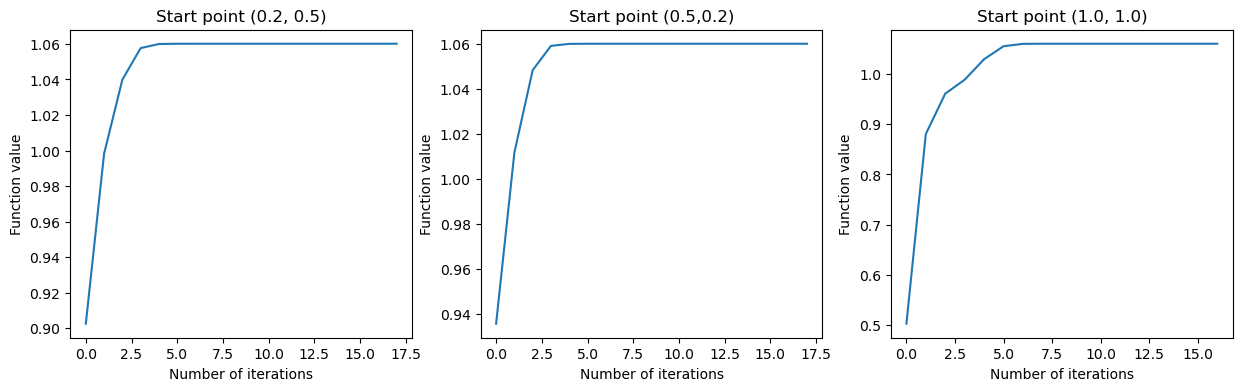

In [351]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
points = ['(0.2, 0.5)','(0.5,0.2)','(1.0, 1.0)']
for i, history in enumerate(best_historys):

    f_values = [f(w) for w in history]

    axs[i].plot(range(len(f_values)), f_values)
    axs[i].set_xlabel("Number of iterations")
    axs[i].set_ylabel("Function value")
    axs[i].set_title(f"Start point {points[i]}")  

plt.show()

#### (f)

Based on the uploaded plots showing the trajectories of the optimization process for three different starting points, here’s a brief discussion about local versus global maxima:

1. **Convergence Points**: Each of the optimization paths seems to converge to a point. If these points are the same for all starting positions, it's a strong indication that the function has a single global maximum, at least within the explored region.

2. **Shape of Trajectories**: The trajectories appear to follow the steepest ascent paths towards the maxima. If they all end at the same point, regardless of their starting positions, this could imply that the function doesn't have multiple isolated local maxima within the region that could trap the optimization process.

3. **Objective Function Behavior**: Since the function is composed of exponential terms, which are smooth and continuous, and the plots don't show any abrupt changes in direction or isolated peaks, it suggests that the function may not have many local maxima, or that the local maxima are not significantly lower than the global maximum, making them less likely to impede the search for the global maximum.

4. **Initial Points and Step Sizes**: The choice of initial points and step sizes can greatly affect the optimization process. If a function has many local maxima and the initial point is in the attraction basin of a local maximum that is not the global one, the optimization might converge to that local maximum. However, if the optimization consistently reaches the same point from widely different starting positions, as observed in the plots, it suggests that the global maximum is being found.

From these observations, one might conclude that the function likely has a single global maximum within the explored region, as all trajectories seem to converge to the same point. To confirm this, one could perform further analysis such as examining the function's second-order derivatives (e.g., the Hessian matrix in the case of multivariate functions), which can provide information about the curvature and can help distinguish between local maxima, minima, and saddle points. Additionally, testing with a broader range of starting points and different step sizes could further validate these conclusions.

### 2.

In [3]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import copy

np.random.seed(1)


mean = np.zeros(2)
cov = np.array([[1.0, 0.5], [0.5, 1.0]])
precision = np.linalg.inv(cov)

size = 1000
samples = sps.multivariate_normal.rvs(mean=mean, cov=cov, size=size)
samples.shape

(1000, 2)

$$
f(x, y) = \frac{1}{2 \pi \sqrt{|\Sigma|}} \exp\left(-\frac{1}{2}(\mathbf{x} - \mu)^ T \Sigma^{-1} (\mathbf{x} - \mu)\right)
$$

in,
- $\mathbf{x} = (x, y)^T$ is a two-dimensional random vector,
- $\mu = (\mu_x, \mu_y)^T$ is the mean vector,
- $\Sigma$ is the covariance matrix,
- $|\Sigma|$ is the determinant of the covariance matrix.

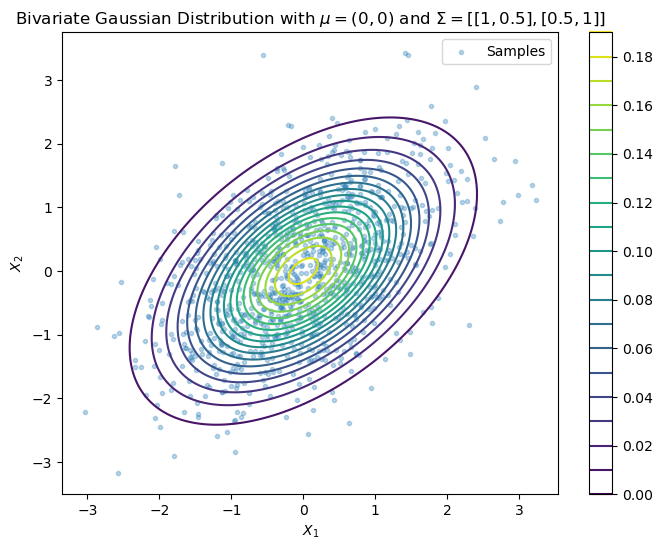

In [14]:
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

# 绘制样本点和等高线图
plt.figure(figsize=(8, 6))

# 绘制样本点
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.3, label='Samples',marker='.')

# 生成网格来绘制等高线图
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(mean, cov)
contour = plt.contour(x, y, rv.pdf(pos), levels=20)

plt.colorbar(contour)
plt.title('Bivariate Gaussian Distribution with $\mu = (0, 0)$ and $\Sigma = [[1, 0.5], [0.5, 1]]$')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.show()


#### (a)

In [56]:
P_initial_points = [np.array([[a, b], [b, a]],dtype=np.float64) for a, b in [(0.1, 0.1), (0.01, 0.01), (1, 1)]]
step_sizes = [1e-5, 1e-4, 1e-3]
iterations = 10000
P_initial_points

[array([[0.1, 0.1],
        [0.1, 0.1]]),
 array([[0.01, 0.01],
        [0.01, 0.01]]),
 array([[1., 1.],
        [1., 1.]])]

In [57]:
import numpy as np

def gradient_whole(P, samples, lambda_reg=1e-6):
    N = samples.shape[0]
    P_reg = P + lambda_reg * np.eye(P.shape[0])  # Add regularization terms, otherwise face matrix singularities
    grad = np.sum([np.linalg.inv(P_reg) - np.outer(samples[i], samples[i]) for i in range(N)], axis=0)
    return grad / (2 * N)

def gradient(P, sample, lambda_reg=1e-6):
    """SGD"""
    P_reg = P + lambda_reg * np.eye(P.shape[0])  # Adding a regularization term
    grad = np.linalg.inv(P_reg) - np.outer(sample, sample)
    return grad / 2

In [64]:
from tqdm import tqdm

def stochastic_gradient_descent(P_init, step_size, samples, iterations):
    """Stochastic gradient descent method, using a different random sample for each iteration"""
    P = P_init.astype(np.float64)
    objective_values = []
    for i in tqdm(range(iterations), desc='SGD Progress'): # Add progress bar
        idx = np.random.permutation(len(samples)) # Randomly shuffle the indices
        
        for j in idx:
            sample = samples[j]
            grad = gradient(P, sample)
            print(grad)
            P += step_size * grad
        # Calculate objective function value after each iteration
        objective_value =  np.linalg.det(P) #0.5 * np.sum(np.diagonal(np.dot(np.dot(samples, np.linalg.inv(P + 1e-6*np.eye(P.shape[0]))), samples.T)))
#         print(objective_value)
        
        objective_values.append(objective_value)
#     print(objective_values)
    return P, objective_values


In [65]:
optimized_Ps = []
objective_values_all = []

for P_init in P_initial_points:
    for step_size in step_sizes:
        print(f'Step size: {step_size}')
        P_opt, objective_values = stochastic_gradient_descent(P_init, step_size, samples, iterations)
#         print(objective_values)
        optimized_Ps.append(P_opt)
        objective_values_all.append(objective_values)


Step size: 1e-05


SGD Progress:   0%|                                                                          | 0/10000 [00:00<?, ?it/s]

[[ 249999.92811057 -250000.3660285 ]
 [-250000.3660285   249999.27438305]]
[[1.01334822 1.4638182 ]
 [1.4638182  1.05734999]]
[[1.29534152 1.21925362]
 [1.21925362 1.21730182]]
[[0.73794986 0.57623726]
 [0.57623726 0.60774518]]
[[0.07454259 0.12862636]
 [0.12862636 0.36333136]]
[[0.95632152 1.59667079]
 [1.59667079 0.84045105]]
[[0.40862171 0.92264531]
 [0.92264531 1.21345275]]
[[1.03666899 1.18037788]
 [1.18037788 1.29799396]]
[[1.04031025 1.44419724]
 [1.44419724 1.06742654]]
[[0.57691779 1.26920902]
 [1.26920902 1.29224999]]
[[1.29306915 1.19465837]
 [1.19465837 1.29581557]]
[[1.03583612 1.10187851]
 [1.10187851 1.26306376]]
[[1.27963327 1.13297808]
 [1.13297808 1.07178779]]
[[0.71141454 0.89213807]
 [0.89213807 1.13862479]]
[[0.80695566 1.57957623]
 [1.57957623 1.00266658]]
[[ 0.27947188 -0.01301869]
 [-0.01301869 -0.14187714]]
[[-0.94750057  0.62227582]
 [ 0.62227582  1.15050629]]
[[-0.12124072  0.54031778]
 [ 0.54031778  0.99327004]]
[[-0.15134905  0.39741226]
 [ 0.39741226  0.85

SGD Progress:   0%|                                                                  | 1/10000 [00:00<35:29,  4.70it/s]

[[0.81275074 0.90873085]
 [0.90873085 1.10905957]]
[[1.07262956 1.17949888]
 [1.17949888 1.1836463 ]]
[[1.18809717 1.06220264]
 [1.06220264 1.11033968]]
[[ 0.04044759 -0.43017638]
 [-0.43017638 -0.81781643]]
[[1.19748085 1.1167332 ]
 [1.1167332  1.21328648]]
[[0.88400778 0.99718689]
 [0.99718689 1.17255479]]
[[1.17002257 1.03958335]
 [1.03958335 1.08791347]]
[[0.86118731 0.46010515]
 [0.46010515 0.0017266 ]]
[[1.06317989 0.79095659]
 [0.79095659 0.52130622]]
[[1.18263124 1.12241196]
 [1.12241196 1.21062307]]
[[0.70465923 0.80926591]
 [0.80926591 1.0315998 ]]
[[0.87650968 0.8270705 ]
 [0.8270705  0.97009084]]
[[1.17878165 1.02090112]
 [1.02090112 0.96510413]]
[[1.17330932 1.15125189]
 [1.15125189 1.17565194]]
[[0.76792454 1.1886514 ]
 [1.1886514  1.1998332 ]]
[[0.79942234 1.38597   ]
 [1.38597    1.03183392]]
[[1.11644199 0.8666006 ]
 [0.8666006  0.58307299]]
[[1.18297892 1.01553155]
 [1.01553155 0.89353099]]
[[1.0023893  0.78146712]
 [0.78146712 0.69093873]]
[[0.72294519 1.28190208]
 [

SGD Progress:   0%|                                                                  | 2/10000 [00:00<36:57,  4.51it/s]

[[0.85157962 0.53369677]
 [0.53369677 0.26008198]]
[[1.14956652 1.03301999]
 [1.03301999 1.0758183 ]]
[[0.97457137 0.70351924]
 [0.70351924 0.47138619]]
[[0.43640911 1.10561943]
 [1.10561943 1.15298339]]
[[0.69223818 0.62922347]
 [0.62922347 0.7633665 ]]
[[0.69639471 0.46079159]
 [0.46079159 0.38524279]]
[[ 0.26391344 -0.13824436]
 [-0.13824436 -0.44269404]]
[[0.94930317 1.41615411]
 [1.41615411 0.52857764]]
[[0.2417003  0.37636613]
 [0.37636613 0.6509218 ]]
[[1.14928813 1.05553981]
 [1.05553981 1.15601484]]
[[ 1.15566589  1.06438898]
 [ 1.06438898 -0.73991254]]
[[1.04467866 0.97049227]
 [0.97049227 1.09042869]]
[[ 0.46460143  0.1484666 ]
 [ 0.1484666  -0.03522047]]
[[0.79664087 0.85112595]
 [0.85112595 1.03926503]]
[[1.15318013 1.04328605]
 [1.04328605 1.08949195]]
[[1.09036607 0.90416232]
 [0.90416232 0.80349291]]
[[1.14353701 1.06038987]
 [1.06038987 1.15325546]]
[[ 0.22613267 -0.28680276]
 [-0.28680276 -0.78324699]]
[[1.14847273 1.03426274]
 [1.03426274 1.08964206]]
[[0.92937711 0.

SGD Progress:   0%|                                                                  | 3/10000 [00:00<36:58,  4.51it/s]

[[-0.30119351 -0.13681963]
 [-0.13681963  0.17893208]]
[[0.5684529  0.41026076]
 [0.41026076 0.44616395]]
[[0.12476878 0.1685022 ]
 [0.1685022  0.3918646 ]]
[[1.1308207  1.01684165]
 [1.01684165 0.90348866]]
[[0.27880186 0.74898345]
 [0.74898345 1.03821684]]
[[1.04805156 1.10660846]
 [1.10660846 1.06484903]]
[[ 0.91700569  0.44674095]
 [ 0.44674095 -0.46267223]]
[[ 0.05339479 -0.65272819]
 [-0.65272819 -1.49958179]]
[[0.96699955 0.65301941]
 [0.65301941 0.26073552]]
[[0.94027292 0.74150932]
 [0.74150932 0.69177704]]
[[1.08803622 1.09739533]
 [1.09739533 1.03177189]]
[[1.08082977 0.9664391 ]
 [0.9664391  1.04802236]]
[[1.10059203 1.04045661]
 [1.04045661 1.12881758]]
[[0.91809584 0.88666958]
 [0.88666958 1.03334697]]
[[1.08890875 0.92508244]
 [0.92508244 0.86447441]]
[[0.55398362 0.6943235 ]
 [0.6943235  0.93474254]]
[[-0.03663977  0.74455449]
 [ 0.74455449  1.06092051]]
[[ 1.05032376  1.41221312]
 [ 1.41221312 -0.67431616]]
[[ 0.63010895  0.12683507]
 [ 0.12683507 -0.50128377]]
[[0.801

SGD Progress:   0%|                                                                  | 4/10000 [00:00<36:50,  4.52it/s]

[[ 0.49028367  0.11849237]
 [ 0.11849237 -0.18007734]]
[[1.06726144 0.9764844 ]
 [0.9764844  1.07019192]]
[[ 0.91748707  0.49607637]
 [ 0.49607637 -0.3921445 ]]
[[-0.71295027  0.79770073]
 [ 0.79770073  1.05571345]]
[[0.10826771 0.75215354]
 [0.75215354 1.0224311 ]]
[[1.04787767 0.91219558]
 [0.91219558 0.92436121]]
[[0.35259045 0.68814587]
 [0.68814587 0.96040631]]
[[1.04488711 1.03912833]
 [1.03912833 0.90922293]]
[[ 1.02259399  1.26155957]
 [ 1.26155957 -0.61749933]]
[[ 0.43284328  1.93133544]
 [ 1.93133544 -0.36680134]]
[[0.81485122 1.14596453]
 [1.14596453 0.95479379]]
[[1.06923088 0.9246763 ]
 [0.9246763  0.23155768]]
[[-0.54267706  1.53970909]
 [ 1.53970909  0.87255768]]
[[ 0.71952393  0.31854988]
 [ 0.31854988 -0.13959142]]
[[0.92998123 0.72012924]
 [0.72012924 0.6251653 ]]
[[1.06753003 0.96724819]
 [0.96724819 1.06711445]]
[[1.02566762 0.79554141]
 [0.79554141 0.39621597]]
[[ 0.60422466 -0.16837144]
 [-0.16837144 -1.70918884]]
[[1.00356141 1.02357366]
 [1.02357366 1.03231056]]

SGD Progress:   0%|                                                                  | 5/10000 [00:01<36:49,  4.52it/s]

[[0.4326442  1.13546282]
 [1.13546282 0.94790931]]
[[1.02133055 0.87820454]
 [0.87820454 0.01215744]]
[[0.75437387 0.92274879]
 [0.92274879 1.0237984 ]]
[[-2.83652738 -0.57568396]
 [-0.57568396  0.44153562]]
[[0.27513647 0.74605806]
 [0.74605806 0.98174254]]
[[-0.61199407 -0.04089931]
 [-0.04089931  0.45512448]]
[[0.53934448 0.49542964]
 [0.49542964 0.64528547]]
[[ 0.99709373  0.75802579]
 [ 0.75802579 -0.02221483]]
[[1.02276183 0.92449386]
 [0.92449386 1.02014302]]
[[-0.49057545  0.73172906]
 [ 0.73172906  0.99935583]]
[[0.88023756 0.62377799]
 [0.62377799 0.39591694]]
[[-1.27524226  0.14458452]
 [ 0.14458452  0.75975553]]
[[0.42283768 0.96672222]
 [0.96672222 1.02032847]]
[[0.76583392 1.09695174]
 [1.09695174 0.9058459 ]]
[[1.0126539  0.97052801]
 [0.97052801 0.80265397]]
[[-0.12958391  0.88381109]
 [ 0.88381109  1.02195644]]
[[0.96984759 0.9783928 ]
 [0.9783928  0.96499768]]
[[0.8564156  1.0091592 ]
 [1.0091592  0.97831139]]
[[0.99501693 0.92573785]
 [0.92573785 1.02275749]]
[[-1.04

[[0.800536   0.84501184]
 [0.84501184 0.97498263]]
[[0.98137872 0.872669  ]
 [0.872669   0.81969992]]
[[0.94324177 0.79836017]
 [0.79836017 0.8012841 ]]
[[0.90159621 0.67910309]
 [0.67910309 0.4693928 ]]
[[-1.5958268  -0.36287234]
 [-0.36287234  0.38122028]]
[[-0.17917283  0.11437102]
 [ 0.11437102  0.47491134]]
[[0.54943982 0.50164125]
 [0.50164125 0.64787778]]
[[0.98093529 0.87725058]
 [0.87725058 0.95577787]]
[[0.93576367 0.70567089]
 [0.70567089 0.30649825]]
[[0.78622231 0.51593765]
 [0.51593765 0.29732043]]
[[0.46553381 0.85135474]
 [0.85135474 0.98039531]]
[[0.83532513 0.73906392]
 [0.73906392 0.84301827]]
[[0.76024678 1.10445053]
 [1.10445053 0.7576571 ]]
[[0.97175344 0.85155227]
 [0.85155227 0.88885403]]
[[0.53896999 0.96695793]
 [0.96695793 0.96543956]]
[[-1.08696832  0.60365909]
 [ 0.60365909  0.9445786 ]]
[[0.97903214 0.86920983]
 [0.86920983 0.91569401]]
[[ 0.7616197   0.40479077]
 [ 0.40479077 -0.05241848]]
[[0.95799616 0.90861148]
 [0.90861148 0.94970369]]
[[0.81781476 1.

SGD Progress:   0%|                                                                  | 6/10000 [00:01<38:21,  4.34it/s]

[[ 0.9495997   0.999847  ]
 [ 0.999847   -1.43712092]]
[[ 0.80297202  0.38158761]
 [ 0.38158761 -0.50644865]]
[[0.28601871 0.69655319]
 [0.69655319 0.91971989]]
[[ 0.90836099  1.14735781]
 [ 1.14735781 -0.73151183]]
[[-1.36863289  0.104844  ]
 [ 0.104844    0.7146524 ]]
[[0.75555977 0.75639442]
 [0.75639442 0.90744258]]
[[0.60579833 0.69015764]
 [0.69015764 0.8784418 ]]
[[0.36698208 1.06980578]
 [1.06980578 0.88235545]]
[[0.73297381 0.73672552]
 [0.73672552 0.89304068]]
[[0.21897944 1.3955032 ]
 [1.3955032  0.56683256]]
[[ 0.52920265  0.1852341 ]
 [ 0.1852341  -0.09747828]]
[[-0.16757267  0.28240072]
 [ 0.28240072  0.66401822]]
[[0.85674054 0.70489404]
 [0.70489404 0.72659674]]
[[0.930299   0.81582528]
 [0.81582528 0.89385925]]
[[0.94519392 0.78757812]
 [0.78757812 0.55850607]]
[[0.92658131 0.80827537]
 [0.80827537 0.87928656]]
[[ 0.94631461  0.96126485]
 [ 0.96126485 -0.0176474 ]]
[[0.95098836 0.88408941]
 [0.88408941 0.845469  ]]
[[0.73072805 1.11850324]
 [1.11850324 0.65683519]]
[[0

[[0.85800383 0.88051851]
 [0.88051851 0.93398526]]
[[0.76029687 0.93116026]
 [0.93116026 0.90844598]]
[[0.69544306 0.66763006]
 [0.66763006 0.81949736]]
[[0.94130477 0.88824561]
 [0.88824561 0.58971453]]
[[0.89298486 0.74080761]
 [0.74080761 0.73748411]]
[[0.94156729 0.86563749]
 [0.86563749 0.86420858]]
[[0.86920944 0.6953612 ]
 [0.6953612  0.65060068]]
[[0.73934996 1.20630033]
 [1.20630033 0.31909067]]
[[-0.50352132  0.04541266]
 [ 0.04541266  0.5043252 ]]
[[-0.37593393 -0.76991375]
 [-0.76991375 -1.02897859]]
[[0.54828129 0.62495564]
 [0.62495564 0.82365424]]
[[-0.17020494 -0.31535566]
 [-0.31535566 -0.26198061]]
[[-0.26481276  0.5585664 ]
 [ 0.5585664   0.8783582 ]]
[[0.46202608 0.41815215]
 [0.41815215 0.5681703 ]]
[[0.94440262 0.83941893]
 [0.83941893 0.91732767]]
[[ 0.73131426  0.26113186]
 [ 0.26113186 -0.64795534]]
[[0.93617782 0.81599512]
 [0.81599512 0.85337643]]
[[0.39691811 0.48230033]
 [0.48230033 0.70554285]]
[[0.84620497 0.89826732]
 [0.89826732 0.91891539]]
[[ 0.254763

SGD Progress:   0%|                                                                  | 6/10000 [00:01<43:36,  3.82it/s]

[[-0.27087018 -0.25650478]
 [-0.25650478 -0.05262838]]
[[0.82708464 0.5576203 ]
 [0.5576203  0.19736684]]
[[-2.81576156 -0.25853716]
 [-0.25853716  0.61226509]]
[[0.23488883 0.37542706]
 [0.37542706 0.63277   ]]
[[-1.12988375 -1.30523284]
 [-1.30523284 -1.28295233]]
[[ 0.76850167  1.77952251]
 [ 1.77952251 -4.84431985]]
[[0.89493989 0.77120654]
 [0.77120654 0.82944651]]
[[-0.15605475  1.04057761]
 [ 1.04057761  0.8842209 ]]
[[0.70087842 1.11281658]
 [1.11281658 0.56131077]]
[[0.90247571 0.9615851 ]
 [0.9615851  0.1403024 ]]
[[0.0728834  0.54317737]
 [0.54317737 0.83280837]]
[[0.91930106 0.85073007]
 [0.85073007 0.83163357]]
[[-0.66187549 -0.02341992]
 [-0.02341992  0.47213014]]
[[-1.01019995  0.07710677]
 [ 0.07710677  0.63686887]]
[[0.86168856 0.69942504]
 [0.69942504 0.67667333]]
[[-0.1746224  -0.71321675]
 [-0.71321675 -1.22637966]]
[[0.90439998 0.79703613]
 [0.79703613 0.8874063 ]]
[[0.91340223 0.75584246]
 [0.75584246 0.52689141]]
[[-0.35420196  0.2770951 ]
 [ 0.2770951   0.691145

KeyboardInterrupt: 

In [53]:
objective_values_all

[[1.0815228441070397,
  1.1547170780396943,
  1.2212023264243563,
  1.2823362699414895,
  1.3388897815910883,
  1.3916108333690769,
  1.4409346059393078,
  1.487307501090617,
  1.5311275945383043,
  1.5726225688459656,
  1.6120867892022108,
  1.6496213095832228,
  1.685432303851726,
  1.7196916943704808,
  1.7525035553672814,
  1.783980247312487,
  1.8142134447072822,
  1.8432990043122173,
  1.8713225560043805,
  1.8983321506944841,
  1.9243781796836252,
  1.9495340422373495,
  1.9738609762643131,
  1.9973807464856355,
  2.020161548714104,
  2.042237122030398,
  2.063640344360516,
  2.084414083903765,
  2.1045606993855395,
  2.124122643472287,
  2.1431554011749356,
  2.161611276523994,
  2.1796026370072457,
  2.197102489816767,
  2.2141475737787015,
  2.2307195662557455,
  2.2468690571957746,
  2.2626201669470265,
  2.2779729710284067,
  2.292945017936977,
  2.307513493198888,
  2.321751968799688,
  2.3356411619437156,
  2.349216486030466,
  2.36247188111997,
  2.3754269956938043,
  2.

In [54]:
# 计算每个P矩阵的行列式
determinants = [np.linalg.det(P) for P in objective_values_all[0]]
determinants

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

#### (b)

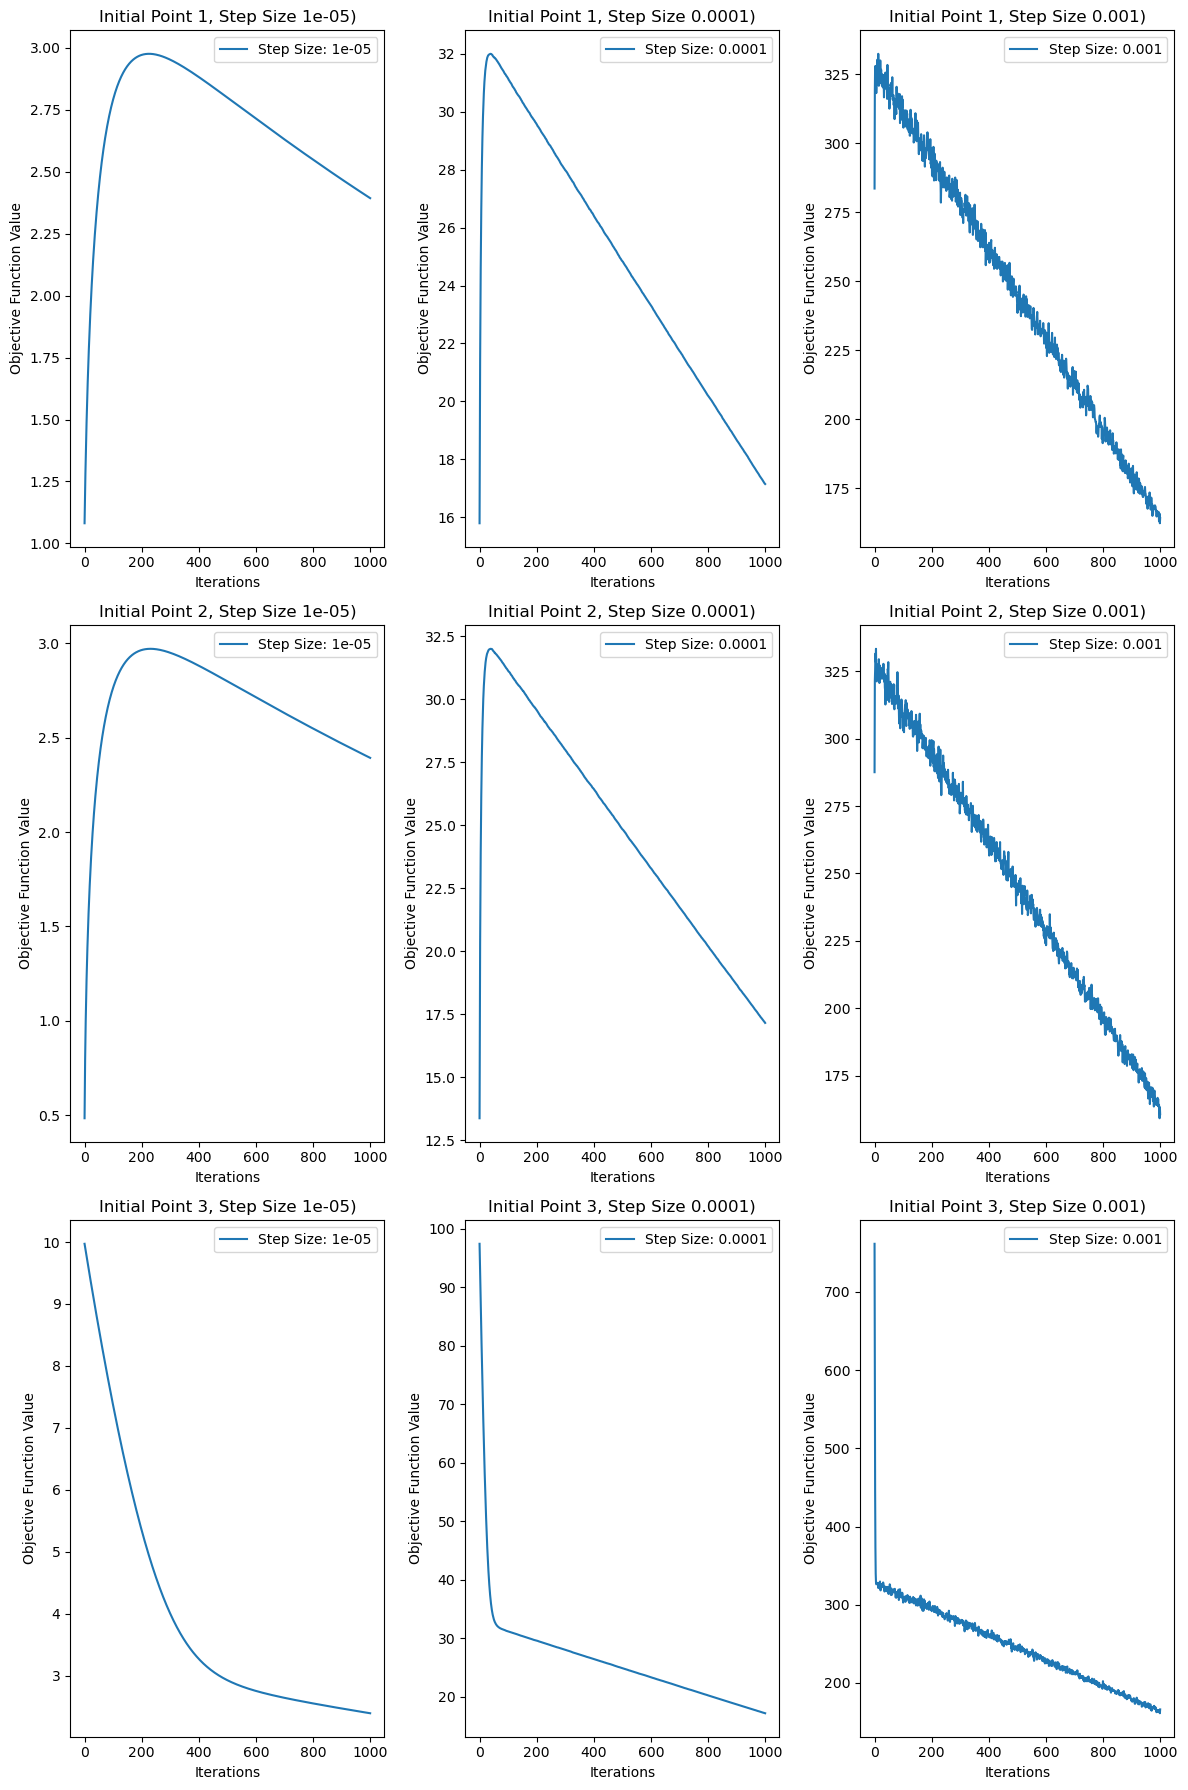

In [55]:
plt.figure(figsize=(12, 18))

for i, P_init in enumerate(P_initial_points):
    for j, step_size in enumerate(step_sizes):
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.title(f"Initial Point {i+1}, Step Size {step_size})")
        plt.xlabel("Iterations")
        plt.ylabel("Objective Function Value")

        objective_values = objective_values_all[i * len(step_sizes) + j]
#         print(objective_values)
        plt.plot(range(iterations), objective_values, label=f"Step Size: {step_size}")
        
        plt.legend()

plt.tight_layout()
plt.show()


#### (c)

In [527]:
Sigma_inv = np.linalg.inv(cov)

errors = [np.linalg.norm(Sigma_inv - P_opt, ord=2) for P_opt in optimized_Ps]

for i, error in enumerate(errors):
    print(f"Run {i+1}, Estimation Error: {error}")


Run 1, Estimation Error: 0.053139851661202296
Run 2, Estimation Error: 0.05311150631494646
Run 3, Estimation Error: 0.052569245988452716
Run 4, Estimation Error: 0.053134932396949004
Run 5, Estimation Error: 0.05310663221945974
Run 6, Estimation Error: 0.05531485068141642
Run 7, Estimation Error: 0.053149343967798766
Run 8, Estimation Error: 0.053077310422077
Run 9, Estimation Error: 0.053066763986523525
